<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#wk-2" data-toc-modified-id="wk-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>wk 2</a></span><ul class="toc-item"><li><span><a href="#predict-heights-and-compatibility-intervals" data-toc-modified-id="predict-heights-and-compatibility-intervals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>predict heights and compatibility intervals</a></span></li><li><span><a href="#relationship-between-height-(cm)-and-the-natural-logarithm-of-weight-(log-kg)" data-toc-modified-id="relationship-between-height-(cm)-and-the-natural-logarithm-of-weight-(log-kg)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>relationship between height (cm) and the natural logarithm of weight (log-kg)</a></span></li><li><span><a href="#Prior-Predictive-Simulation" data-toc-modified-id="Prior-Predictive-Simulation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Prior Predictive Simulation</a></span></li></ul></li></ul></div>

# wk 2

## predict heights and compatibility intervals 

<b><font color = 'purple'> Provide predicted heights and 89% compatibility intervals for each of these individuals. 

```weights <- c(45,40,65,31,53)```

 Using model-based predictions, predict the height associated with these weights. </font></b>

The weights that interest us are all adult weights, so we can analyze only
the adults and make an okay linear approximation. If you did something
else, that’s okay. I deliberately made the question a little vague. Loading the
data, selecting out adults, and doing the regression from the book:

In [9]:
# data preprocessing
library(rethinking)
data(Howell1)
d <- Howell1
d2 <- d[ d$age >= 18 , ]
xbar <- mean(d2$weight)

In [8]:
# define quap model
m4.3 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*( weight - xbar ) ,
        a ~ dnorm( 178 , 20 ) ,
        b ~ dlnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d2 )

<b><font color = 'purple'>Now we need posterior predictions for each case in the table </font></b>. 

Easiest way to do this is to use sim. <b><font color = 'blue'>We need sim, not just link, because we are trying to predict an individual’s height. </font><font color = 'red'>So the relevant compatibility interval includes the Gaussian variance from sigma</b>. </font>

If you provided only the compatibility interval for µ, that’s okay. But be sure you understand the difference.

In [ ]:
# simulate heights for the weights asked for above

dat <- data.frame( weight=c(45,40,65,31,53) )
h_sim <- sim( m4.3 , data=dat )
# 10,000 simulations of the height prediction for each weight 
# each column represents a set of height predictions for a particular weight input

In [18]:
# extract mean heights and compatability intervals
Eh <- apply(h_sim,2,mean)
h_ci <- apply(h_sim,2,PI,prob=0.89)

In [170]:
# audit

h_sim %>% head
h_sim[,1] %>% summary()

Eh
h_ci %>% head

151.2690,159.3785,171.8398,146.1656,159.2732
146.1567,144.1262,180.0244,133.2396,168.8089
153.5292,156.2753,171.1845,134.9248,158.7660
148.4600,151.4807,171.8021,142.2844,165.3471
153.6891,142.9431,173.2451,150.8968,153.7825
155.2776,149.4766,176.3904,131.9514,158.4453


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  137.4   151.5   154.8   154.8   158.2   169.1 

[1] 154.7732 149.9603 172.6470 142.0148 161.7827

5%,146.4584,141.9192,164.2969,133.8684,153.7766
94%,162.5645,158.9053,181.2138,150.0062,169.9919


Now all in table form:

In [34]:
# create table with answer
dat$Eh <- Eh
dat$L89 <- h_ci[1,]
dat$U89 <- h_ci[2,]
round(dat,1)

weight,Eh,L89,U89
<dbl>,<dbl>,<dbl>,<dbl>
45,154.8,146.5,162.6
40,150.0,141.9,158.9
65,172.6,164.3,181.2
31,142.0,133.9,150.0
53,161.8,153.8,170.0


##### SIM under the hood


In [29]:
# SIM under the hood
post <- extract.samples(m4.3) 
weight.seq <- c(45,40,65,31,53)


sim.height <- sapply( weight.seq , function(weight)
    rnorm( 
        n=nrow(post) ,
        mean=post$a + post$b*( weight - xbar ) ,
        sd=post$sigma ) )
# 10,000 simulations of the height prediction for each weight 
# each column represents a set of height predictions for a particular weight input

expected_heights <- apply( sim.height , 2 , mean)                      
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

In [32]:
expected_heights 

[1] 154.6374 150.1516 172.7963 141.7776 161.8106

In [27]:
sim.height %>% head

158.9053,158.6291,168.2353,142.0849,160.9284
148.9443,153.7130,169.6917,151.0368,169.2770
157.9636,147.4133,178.4411,146.8059,169.7294
141.5763,141.3270,168.5090,141.2683,160.5098
158.0450,147.8916,166.5478,144.4662,153.8646
152.9050,146.7453,160.9594,134.6328,156.4622


In [26]:
sim.height[,1] %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  134.8   151.1   154.6   154.5   157.9   173.4 

## relationship between height (cm) and the natural logarithm of weight (log-kg)

<b><font color = 'purple'>Model the relationship between height (cm) and the natural logarithm of
weight (log-kg): log(weight). 
    
  Use the entire Howell1 data frame, all 544
rows, adults and non-adults. 
    
Use any model type from Chapter 4 that you
think useful: an ordinary linear regression, a polynomial or a spline. 
    
Plot the posterior predictions against the raw data. </font></b>

In [40]:
# model
d$log_weight <- log(d$weight)
xbar <- mean(d$log_weight)
m2 <- quap( alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*( log_weight - xbar ) ,
        a ~ dnorm( 178 , 20 ) ,
        b ~ dlnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

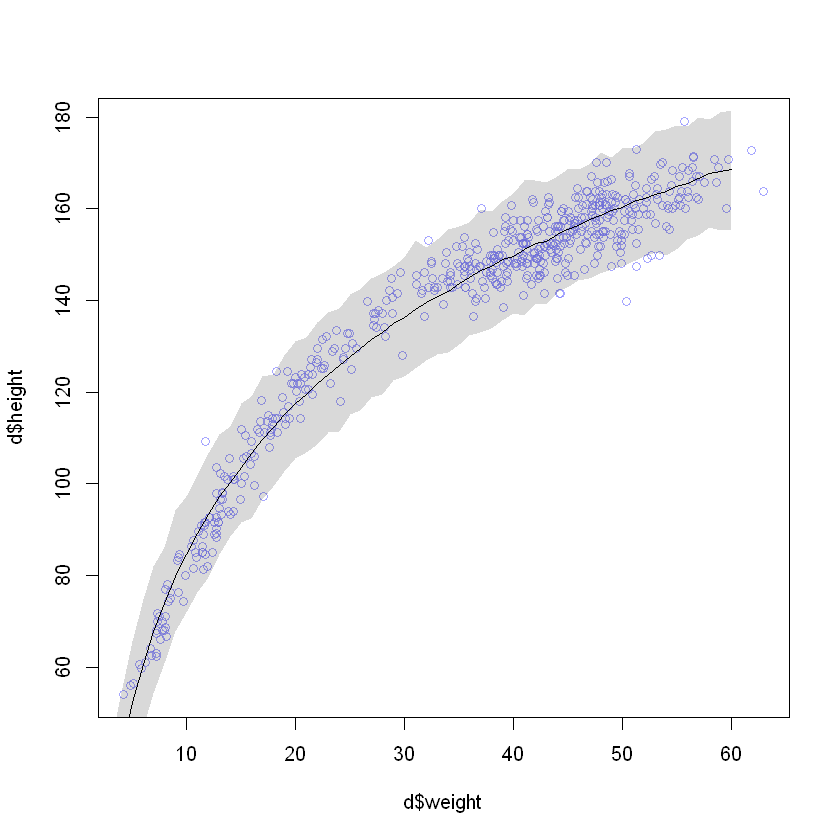

In [41]:
plot( d$weight , d$height , col=col.alpha(rangi2,0.7) )

x_seq <- log(1:60) # sequence of x-values on log scale

mu <- sim( m2 , data=list(log_weight=x_seq) )
# 1,000 simulations of the height prediction for each weight 
# each column represents a set of height predictions for a particular weight input

mu_mean <- apply(mu,2,mean)  # mean height predicted for each weight input
mu_ci <- apply(mu,2,PI,0.99) # compatability interval

lines( exp(x_seq) , mu_mean )  # adds mean height to plot
shade( mu_ci , exp(x_seq) )    # adds shaded compatability interval to plot

##### Improving the model

You could certainly do better—the trend is under-predicting in the mid ages. But just taking the log of weight does most of the work. Why? It’ll help to think of a human body as a cylinder. Roughly. The weight of a cylinder is proportional to its volume. And the volume of a cylinder is:

$V =\pi r^2h$

where r is the radius and h is the height. As the cylinder, uh human, gets taller, the radius gets bigger. So we can just say the radius is some fraction α of the height:

$r =\alpha h$

Substituting that in:

$V =πα^2h^3 =kh^3$

where $k =πα^2$ is just some proportionality constant. Now let’s plot volume (weight) as a function of height, and I’ll compare it to the data viewed the same way:

<img src='pics/SR_d1.png' alt='Drawing' style='width:425pt'/>

In [56]:
mu %>% dim

[1] 1000   60

In [52]:
 log(1:60)

[1] 0.0000000 0.6931472 1.0986123 1.3862944 1.6094379 1.7917595 1.9459101
 [8] 2.0794415 2.1972246 2.3025851 2.3978953 2.4849066 2.5649494 2.6390573
[15] 2.7080502 2.7725887 2.8332133 2.8903718 2.9444390 2.9957323 3.0445224
[22] 3.0910425 3.1354942 3.1780538 3.2188758 3.2580965 3.2958369 3.3322045
[29] 3.3672958 3.4011974 3.4339872 3.4657359 3.4965076 3.5263605 3.5553481
[36] 3.5835189 3.6109179 3.6375862 3.6635616 3.6888795 3.7135721 3.7376696
[43] 3.7612001 3.7841896 3.8066625 3.8286414 3.8501476 3.8712010 3.8918203
[50] 3.9120230 3.9318256 3.9512437 3.9702919 3.9889840 4.0073332 4.0253517
[57] 4.0430513 4.0604430 4.0775374 4.0943446

##### straight line example for comparison

In [50]:
d$log_weight <- log(d$weight)
xbar <- mean(d$weight)
m2b <- quap( alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*( weight - xbar ) ,
        a ~ dnorm( 178 , 20 ) ,
        b ~ dlnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

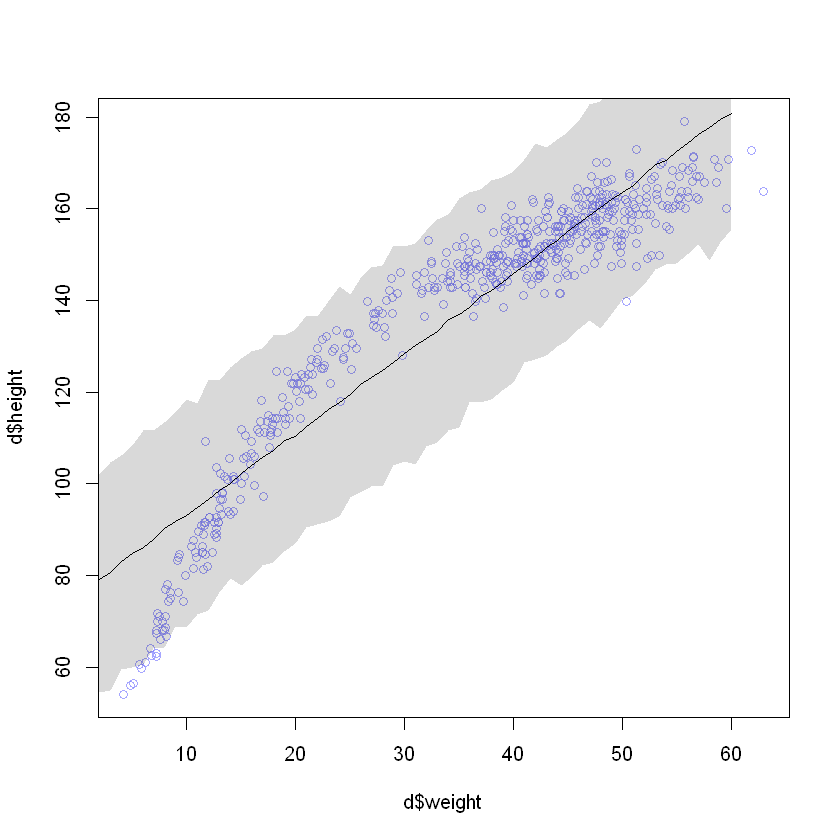

In [51]:
plot( d$weight , d$height , col=col.alpha(rangi2,0.7) )

# x_seq <- log(1:60)
x_seq <- 1:60
mu <- sim( m2b , data=list(weight=x_seq) )
mu_mean <- apply(mu,2,mean)
mu_ci <- apply(mu,2,PI,0.99)
lines( x_seq, mu_mean )
shade( mu_ci , x_seq )

In [ ]:
m5.3 <- quap(  alist(
    D ~ dnorm( mu , sigma ) ,
    mu <- a + log_w + bA*A ,
    a ~ dnorm( 0 , 0.2 ) ,
    bM ~ dnorm( 0 , 0.5 ) ,
    bA ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )
precis( m5.3 )



## Prior Predictive Simulation

<b><font color = 'purple'>Plot the prior predictive distribution for the polynomial regression model in Chapter 4.  </font></b>

* You can modify the the code that plots the linear regression prior predictive distribution. 

* 20 or 30 parabolas from the prior should suffice to show where the prior probability resides. 

<b><font color = 'purple'>Can you modify the prior distributions of α, β1, and β2 so that the prior predictions stay within the biologically reasonable outcome space?  </font></b>

* That is to say: Do not try to fit the data by hand. But do try to keep the curves consistent with what you know about height and weight, before seeing these exact data.

In [165]:
# Define Model and priors
library(rethinking)
data(Howell1)
d <- Howell1
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight)
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b1*weight_s + b2*weight_s2 ,
        a ~ dnorm( 178 , 20 ) ,
        b1 ~ dlnorm( 0 , 1 ) ,
        b2 ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

In [ ]:
# extract prior
set.seed(45)
prior <- extract.prior( m4.5 )

In [66]:
# view prior parameter distributions
precis( prior, hist=FALSE ) %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,177.61,20.72,144.18,211.42
b1,1.61,1.88,0.19,4.43
b2,-0.05,0.97,-1.64,1.45
sigma,25.14,14.59,2.52,47.37


In [166]:
# covariance matrix needed to complete describe the distribution
round( vcov( m4.5 ) , 3 ) ;

,a,b1,b2,sigma
a,0.136,-0.041,-0.075,-0.006
b1,-0.041,0.083,0.041,0.003
b2,-0.075,0.041,0.075,0.006
sigma,-0.006,0.003,0.006,0.031


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



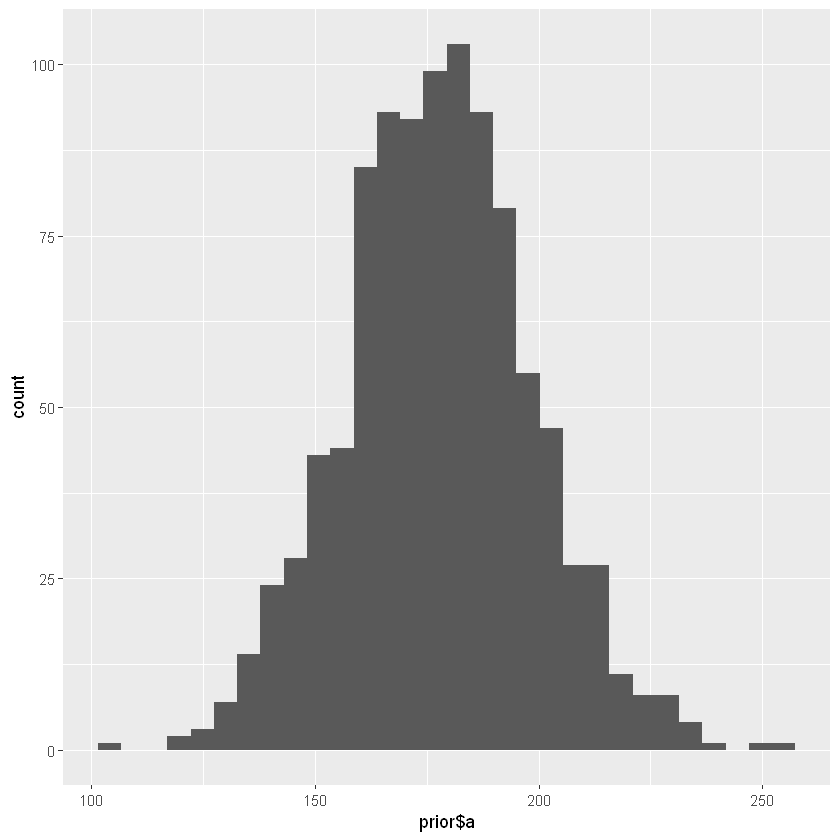

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



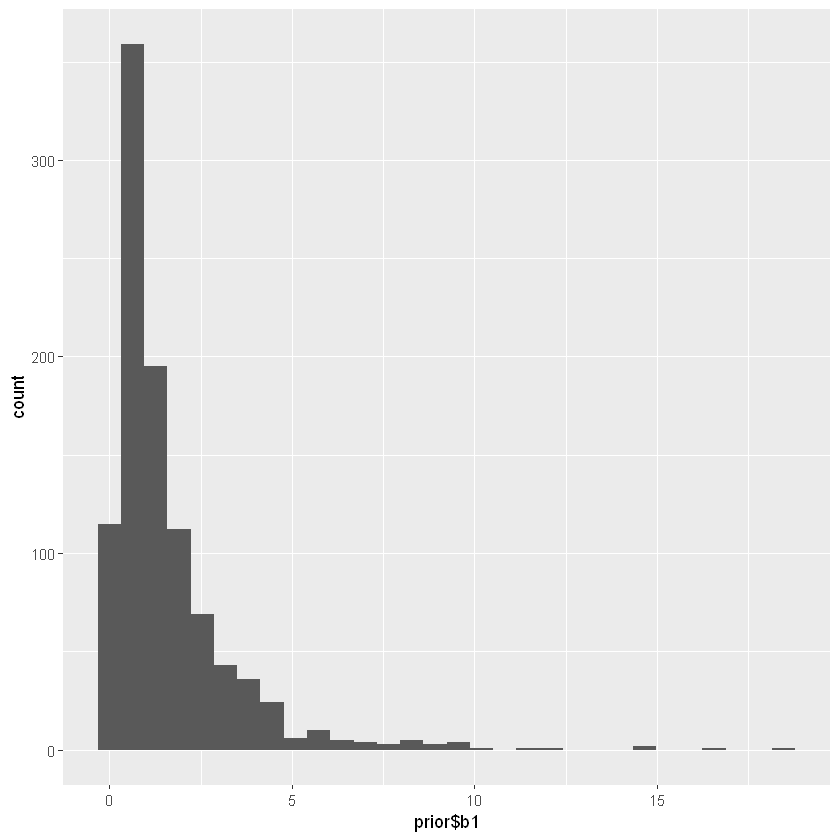

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



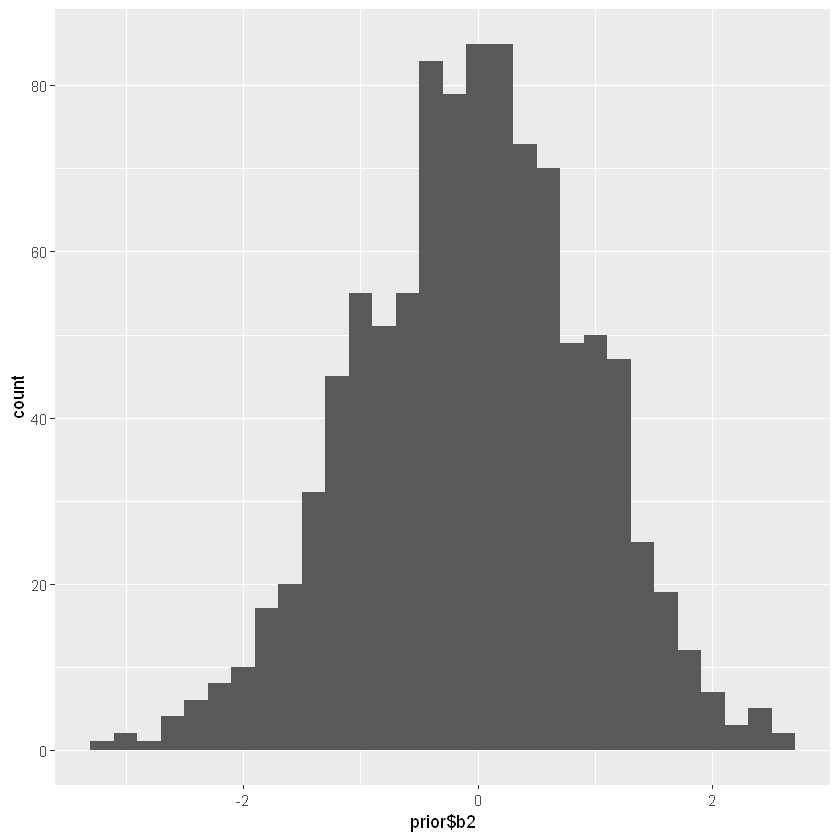

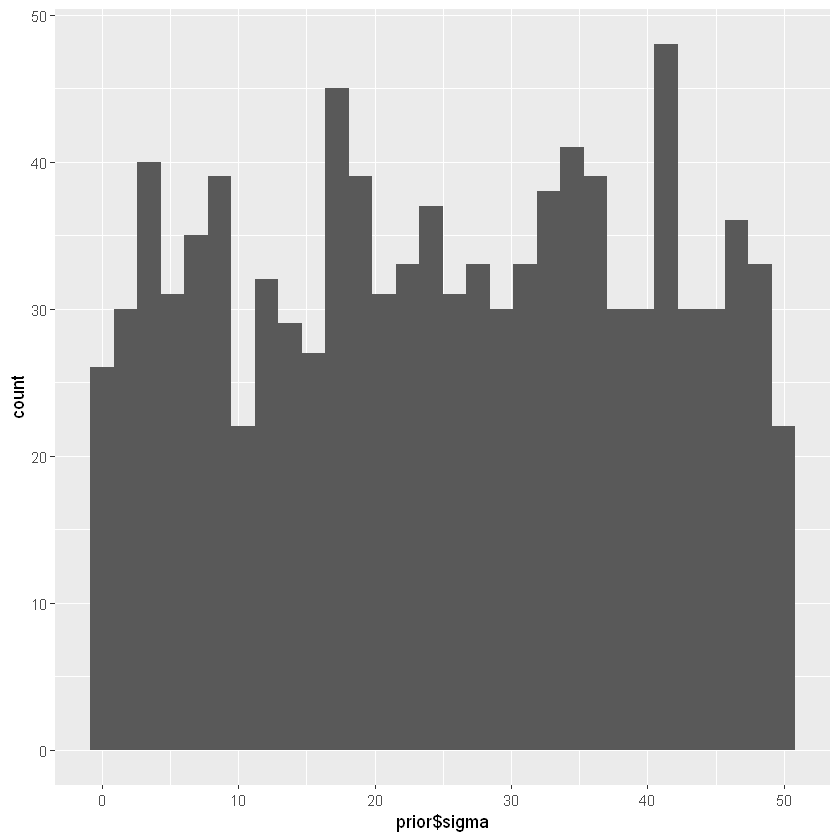

In [79]:
# prior parameter histograms
ggplot(mapping = aes(x = prior$a)) +
    geom_histogram()

ggplot(mapping = aes(x = prior$b1)) +
    geom_histogram()

ggplot(mapping = aes(x = prior$b2)) +
    geom_histogram()

ggplot(mapping = aes(x = prior$sigma)) +
    geom_histogram()

We want to simulate curves (parabolas) from this prior. One way is to use link. Then we won’t have to write the linear model again.

In [150]:
# simulate curves (parabolas) from the prior using link

w_seq <- seq( from = min(d$weight_s), to = max(d$weight_s), length.out = 50 ) 
w2_seq <- w_seq^2  

mu <- link( m4.5 , post=prior ,
    data=list( weight_s=w_seq , weight_s2=w2_seq ) )

# link takes our model (quap approximation), samples from the posterior distribution, 
# and then computes mu for each case in the data (sequence of predictor values) and 
# sample from the posterior distribution.

<b><font color = 'purple'>Now mu should contain 1000 parabolas. We’ll plot just the first 50. </font></b>

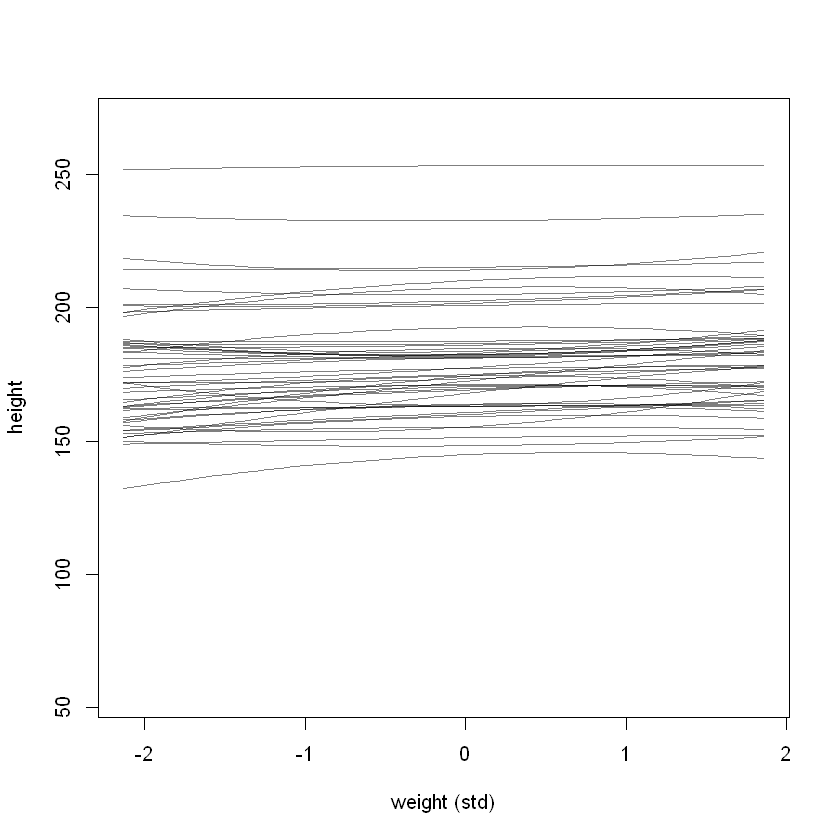

In [156]:
# plot first 50 lines
plot( NULL , xlim=range(w_seq) , ylim=c(55,270) ,
    xlab="weight (std)" , ylab="height" )

for ( i in 1:50 ) lines( w_seq , mu[i,] , col=col.alpha("black",0.5) )

###### Supplemental Notes

<font color = 'blue'>Recall that the world’s tallest person was 270cm tall. The tallest person in the sample is about 180cm. The prior curvature is not very strong</font>. Those parabolas hardly bend at all. 

<b><font color = 'purple'>We can increase the standard deviation on the b2 prior, but that will produce some silly shapes (left below), where either average weight is tallest or shortest. That can’t be right.  </font></b>

* The basic problem is that b2 needs to be negative to make the curve bend down, but b1 has to also change in order to move the maximum height to the right. It’s all a bit confusing, and is they key reason that working with polynomial models is so hard. 

<font color = 'blue'><b><font color = 'purple'>The prior on the right below can only bend down </font></b>, but I’ve made the linear model $a + b1*\text{weight_s} - b2*\text{weight_s2}$ and given $b2$ a logNormal prior.</font>

<img src='pics/SR_e38.png' alt='Drawing' style='width:425pt'/>

<font color = 'blue'>A key problem in getting reasonable curves here is that obviously a and b1 and b2 are correlated in the family of reasonable curves. But the priors are uncorrelated—they are independent of one another</font>. 

Still, if you can get independent priors to at least live within some reasonably space of outcome values, that’s a lot better than flat priors. What would flat priors look like here? Something like this:

<img src='pics/SR_e39.png' alt='Drawing' style='width:225pt'/>

These prior curves actually strongly favor explosive growth or shrinkage near the mean. This is a general phenomenon with “flat” priors: Once the predictor is at all complicated, “flat” does not imply “no relationship.” Do any of the priors above make a difference for inference in this sample? No. There is a lot of data and the model is quite simple, in terms of the way that parameters relate to predictions. This will not always be the case.

In [63]:
# parabola model
library(rethinking)
data(Howell1)
d <- Howell1
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight)
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b1*weight_s + b2*weight_s2 ,
        a ~ dnorm( 178 , 20 ) ,
        b1 ~ dlnorm( 0 , 1 ) ,
        b2 ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

###### <font color = 'lightgrey'>link under the hood</font>

In [163]:
##  link under the hood

# exctract samples from the posterior of parameters
post <- extract.samples(m4.5)

# define linear model
mu.link <- function(weight_s, weight_s2) post$a + post$b1*weight_s + post$b2*weight_s2
       
# define sequence of predictor values (weight)
w_seq <- seq( from = min(d$weight_s), to = max(d$weight_s), length.out = 50 ) 
w2_seq <- w_seq^2 

# For each predictor value, for each sample from the posterior
# compute mu: a + b1*weight_s + b2*weight_s^2
mu <- mapply( mu.link, weight_s=w_seq , weight_s2=w2_seq)

u
mu.mean <- apply( mu , 2 , mean )
mu.CI <- apply( mu , 2 , PI , prob=0.89 )

mu.mean %>% head(5)
mu.CI %>% head

[1] 64.33292 68.75956 73.08267 77.30225 81.41829

5%,62.95559,67.49749,71.92933,76.23839,80.44131,84.53695,88.50866,92.37547,96.12790,99.75946,...,159.9311,160.1344,160.2289,160.2078,160.0788,159.8428,159.4799,159.0096,158.4393,157.7534
94%,65.71772,70.03553,74.26331,78.37729,82.39903,86.32764,90.16623,93.91757,97.56753,101.13245,...,161.3517,161.7160,161.9871,162.1580,162.2432,162.2374,162.1283,161.9192,161.6142,161.2183
